In [194]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, roc_auc_score,
                             f1_score, precision_score, recall_score, confusion_matrix,
                             matthews_corrcoef, log_loss, ConfusionMatrixDisplay)
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier, Perceptron, LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [195]:
data=pd.read_csv("Dataset - Real.csv")
data.head()

Age  Gender  Ethnicity  Religion  Residency  Marital experience  \
0   20       0          1       1.0          1                   0   
1   20       0          1       1.0          1                   0   
2   22       0          1       1.0          1                   0   
3   21       0          1       1.0          1                   0   
4   20       1          1       1.0          1                   0   

   Are you currently enrolled as an undergraduate college student?  \
0                                                  1                 
1                                                  1                 
2                                                  1                 
3                                                  1                 
4                                                  1                 

   Branch of study  \
0              1.0   
1              1.0   
2              3.0   
3              1.0   
4              7.0   

   Do you know someone who has been diagnosed with a sexually transmitted infection?  \
0                                                  0                                   
1                                                  0                                   
2                                                  0                                   
3                                                  0                                   
4                                                  0                                   

   Do you have a previous sexual experience (of any types)  ...  Circumcision  \
0                                                  0        ...             1   
1                                                  0        ...             0   
2                                                  0        ...             0   
3                                                  0        ...             0   
4                                                  0        ...             1   

   Resolution_HIV  Resolution_other  Infertility  Abortion  Premature birth  \
0               1                 1            1         1                1   
1               1                 0            1         1                0   
2               1                 0            0         0                0   
3               1                 1            1         1                1   
4               0                 0            1         1                1   

   Congenital defects  Kidney problems  Cancer  Death  
0                   1                1       0      1  
1                   1                0       1      0  
2                   0                1       1      1  
3                   1                1       1      1  
4                   1                0       0      1  

[5 rows x 72 columns]

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age                                                                                1000 non-null   int64  
 1   Gender                                                                             1000 non-null   int64  
 2   Ethnicity                                                                          1000 non-null   int64  
 3   Religion                                                                           995 non-null    float64
 4   Residency                                                                          1000 non-null   int64  
 5   Marital experience                                                                 1000 non-null   int64 

In [197]:
data.describe()

Age      Gender    Ethnicity    Religion    Residency  \
count  1000.000000  1000.00000  1000.000000  995.000000  1000.000000   
mean     22.311000     0.38200     1.036000    0.973869     0.914000   
std       3.797196     0.48612     0.211539    0.159604     0.280504   
min      16.000000     0.00000     1.000000    0.000000     0.000000   
25%      20.000000     0.00000     1.000000    1.000000     1.000000   
50%      22.000000     0.00000     1.000000    1.000000     1.000000   
75%      23.000000     1.00000     1.000000    1.000000     1.000000   
max      50.000000     1.00000     3.000000    1.000000     1.000000   

       Marital experience  \
count         1000.000000   
mean             0.144000   
std              0.351265   
min              0.000000   
25%              0.000000   
50%              0.000000   
75%              0.000000   
max              1.000000   

       Are you currently enrolled as an undergraduate college student?  \
count                                        1000.000000                 
mean                                            0.945000                 
std                                             0.228094                 
min                                             0.000000                 
25%                                             1.000000                 
50%                                             1.000000                 
75%                                             1.000000                 
max                                             1.000000                 

       Branch of study  \
count       994.000000   
mean          3.232394   
std           2.384770   
min           1.000000   
25%           1.000000   
50%           3.000000   
75%           4.000000   
max          14.000000   

       Do you know someone who has been diagnosed with a sexually transmitted infection?  \
count                                         1000.00000                                   
mean                                             0.23200                                   
std                                              0.42232                                   
min                                              0.00000                                   
25%                                              0.00000                                   
50%                                              0.00000                                   
75%                                              0.00000                                   
max                                              1.00000                                   

       Do you have a previous sexual experience (of any types)  ...  \
count                                        1000.000000        ...   
mean                                            0.269000        ...   
std                                             0.443662        ...   
min                                             0.000000        ...   
25%                                             0.000000        ...   
50%                                             0.000000        ...   
75%                                             1.000000        ...   
max                                             1.000000        ...   

       Circumcision  Resolution_HIV  Resolution_other  Infertility  \
count   1000.000000      1000.00000       1000.000000  1000.000000   
mean       0.726000         0.76800          0.408000     0.549000   
std        0.446232         0.42232          0.491709     0.497842   
min        0.000000         0.00000          0.000000     0.000000   
25%        0.000000         1.00000          0.000000     0.000000   
50%        1.000000         1.00000          0.000000     1.000000   
75%        1.000000         1.00000          1.000000     1.000000   
max        1.000000         1.00000          1.000000     1.000000   

          Abortion  Premature birth  Congenital defects  Kidney problems  \
count  1000.000000      10

In [198]:
z=data['HIV'].value_counts()
z

HIV
1    984
0     16
Name: count, dtype: int64

<Axes: title={'center': 'HIV Status Distribution'}, xlabel='HIV'>

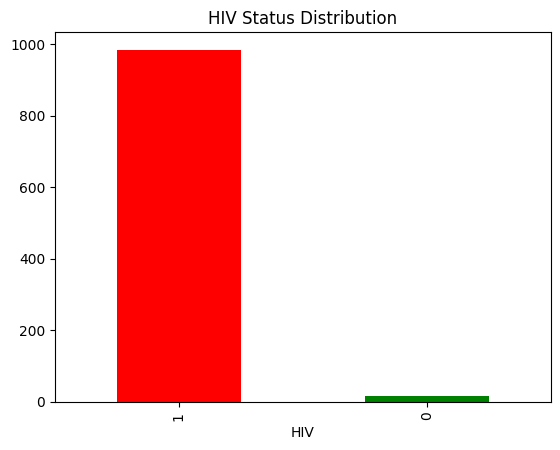

In [199]:
data['HIV'].value_counts().plot(kind='bar', color=['red', 'green'], title='HIV Status Distribution')


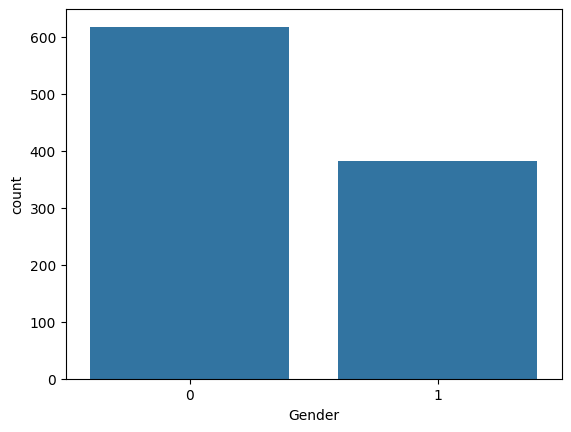

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example with a categorical column
sns.countplot(x='Gender', data=data)
plt.show()


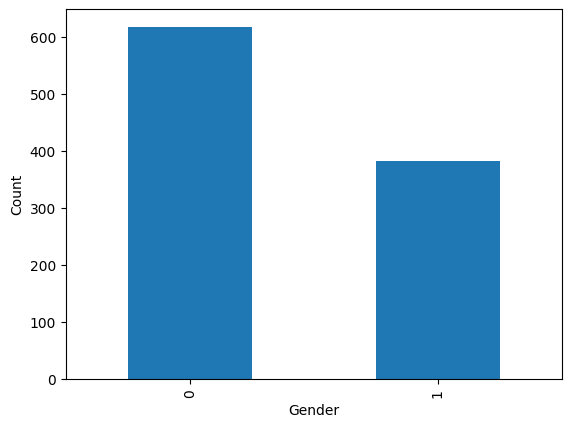

In [201]:
data['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


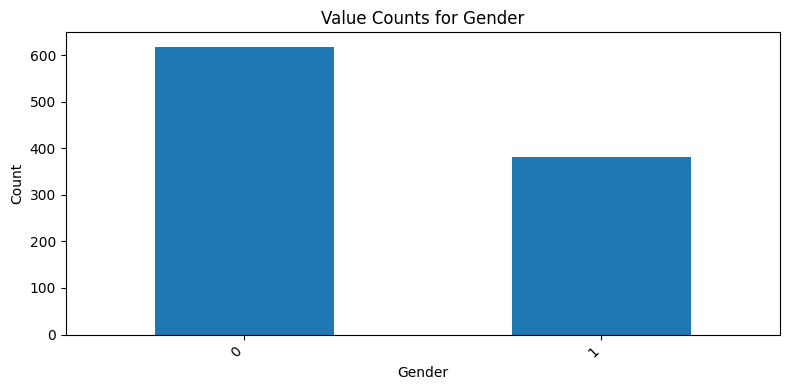

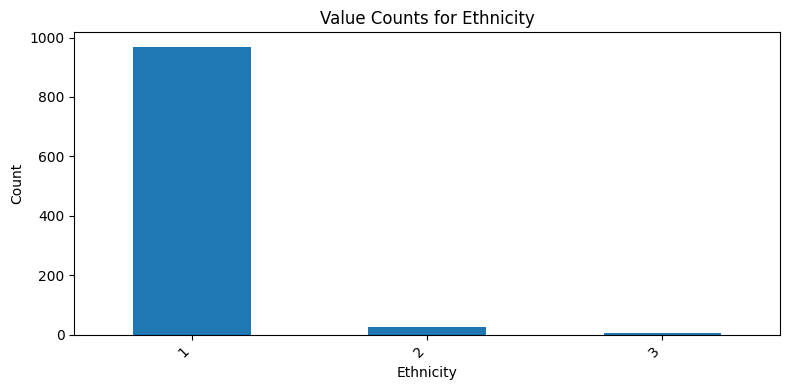

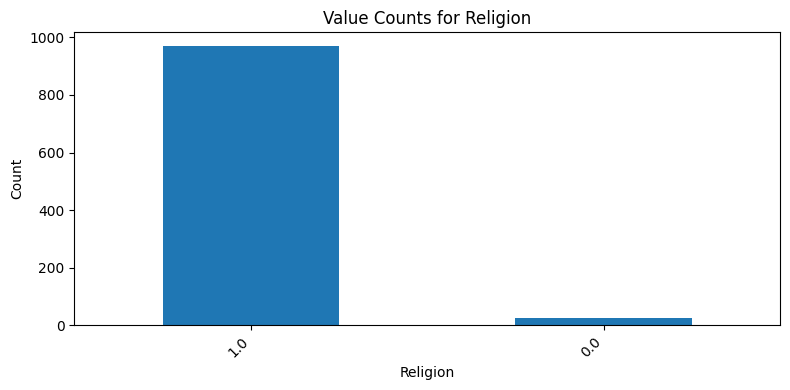

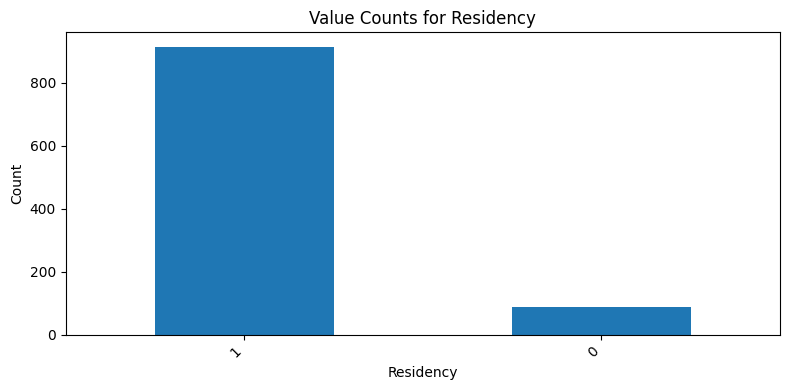

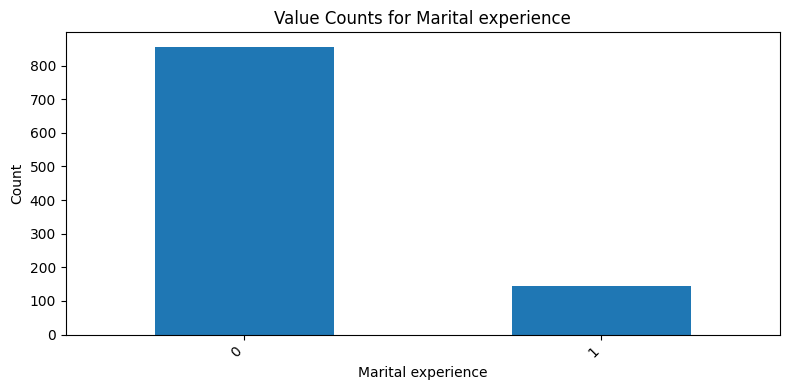

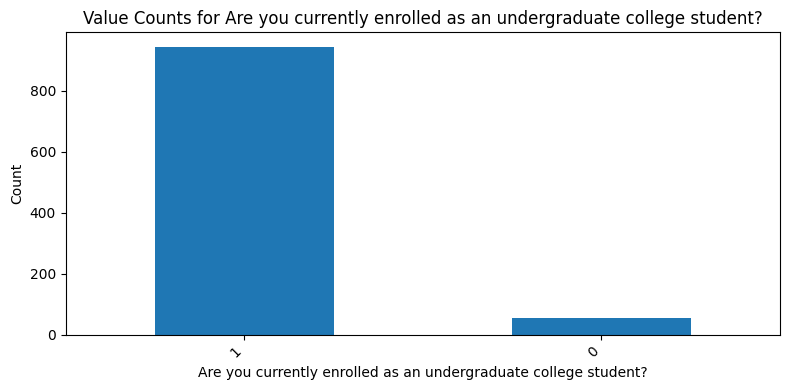

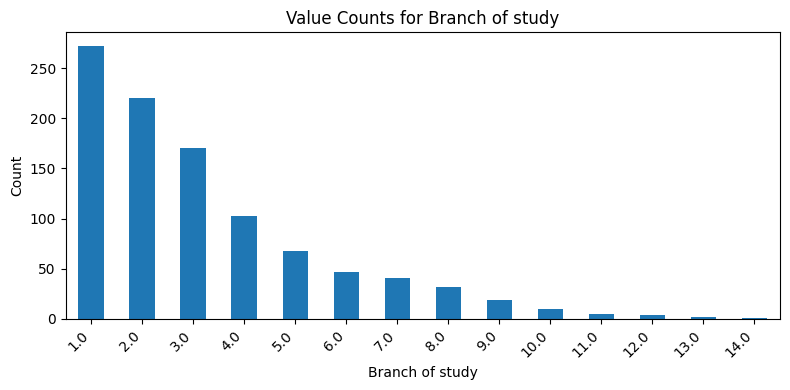

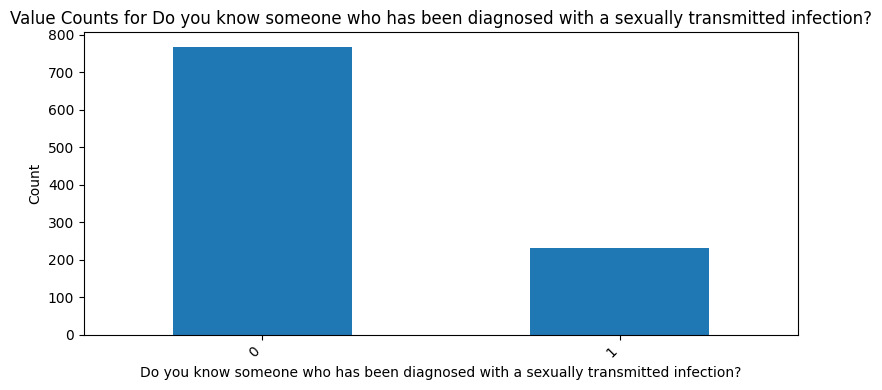

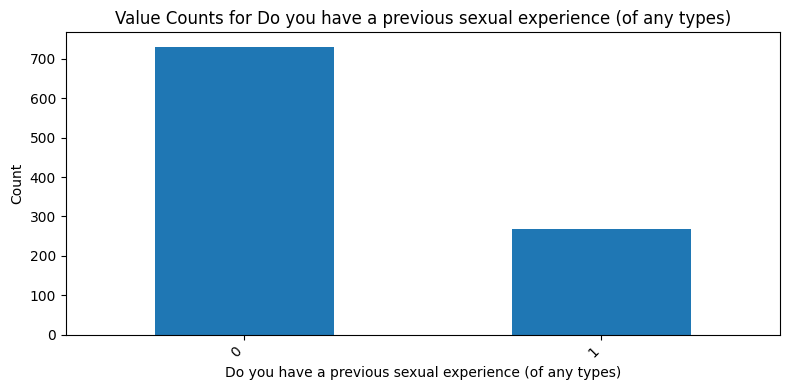

In [202]:
import matplotlib.pyplot as plt

# List of columns to plot (from column 1 to 12 as per your data.info())
columns = [
    'Gender', 'Ethnicity', 'Religion', 'Residency', 'Marital experience',
    'Are you currently enrolled as an undergraduate college student?',
      'Branch of study',
    'Do you know someone who has been diagnosed with a sexually transmitted infection?',
    'Do you have a previous sexual experience (of any types)'
]

for col in columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [203]:
z=data['Ethnicity'].value_counts()
z

Ethnicity
1    969
2     26
3      5
Name: count, dtype: int64

In [204]:
data.isnull().sum()

Age                   0
Gender                0
Ethnicity             0
Religion              5
Residency             0
                     ..
Premature birth       0
Congenital defects    0
Kidney problems       0
Cancer                0
Death                 0
Length: 72, dtype: int64

In [205]:
data.isnull().sum()[data.isnull().sum() > 0]

Religion           5
Branch of study    6
dtype: int64

In [206]:
data[data.isnull().any(axis=1)]


Age  Gender  Ethnicity  Religion  Residency  Marital experience  \
60    21       1          3       NaN          1                   0   
165   20       0          1       1.0          1                   0   
211   20       1          1       1.0          1                   0   
321   18       1          1       1.0          1                   0   
483   20       1          1       NaN          1                   0   
627   22       1          1       NaN          0                   0   
733   16       0          1       1.0          1                   0   
797   17       1          1       1.0          1                   0   
902   23       0          1       NaN          1                   0   
910   18       0          1       1.0          1                   0   
953   22       1          1       NaN          1                   0   

     Are you currently enrolled as an undergraduate college student?  \
60                                                   1                 
165                                                  0                 
211                                                  0                 
321                                                  0                 
483                                                  1                 
627                                                  1                 
733                                                  0                 
797                                                  0                 
902                                                  1                 
910                                                  0                 
953                                                  1                 

     Branch of study  \
60               1.0   
165              NaN   
211              NaN   
321              NaN   
483             13.0   
627              3.0   
733              NaN   
797              NaN   
902             14.0   
910              NaN   
953              5.0   

     Do you know someone who has been diagnosed with a sexually transmitted infection?  \
60                                                   0                                   
165                                                  0                                   
211                                                  1                                   
321                                                  0                                   
483                                                  0                                   
627                                                  0                                   
733                                                  0                                   
797                                                  0                                   
902                                                  0                                   
910                                                  0                                   
953                                                  1                                   

     Do you have a previous sexual experience (of any types)  ...  \
60                                                   0        ...   
165                                                  0        ...   
211                                                  0        ...   
321                                                  0        ...   
483                                                  0        ...   
627                                                  1        ...   
733                                                  0        ...   
797                                                  1        ...   
902                                                  1        ...   
910                                                  0        ...   
953                                                  1        ...   

     Circumcision  Resolution_HIV  Resolution_other  Infertility  Abortion  

In [207]:
data.isnull().sum().sum()


11

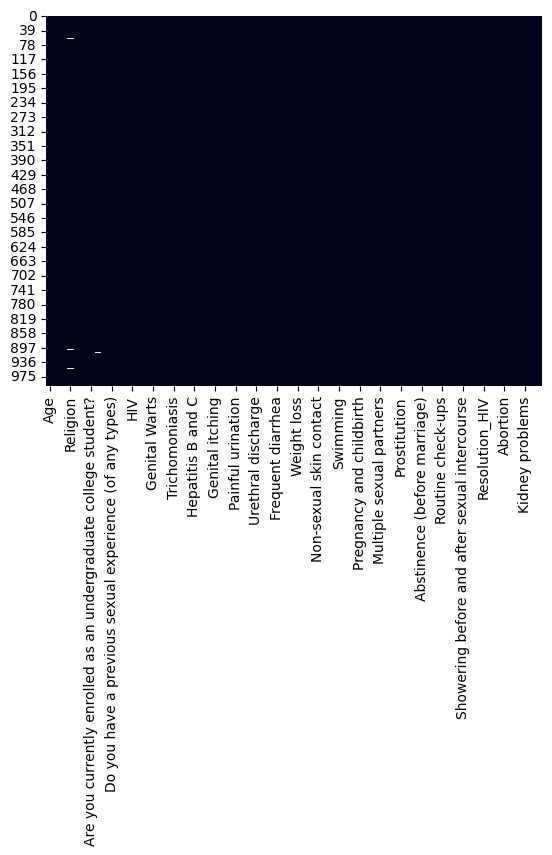

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False)
plt.show()


In [209]:
data.shape

(1000, 72)

In [210]:
data = data.dropna(axis=0)

In [211]:
data.shape

(989, 72)

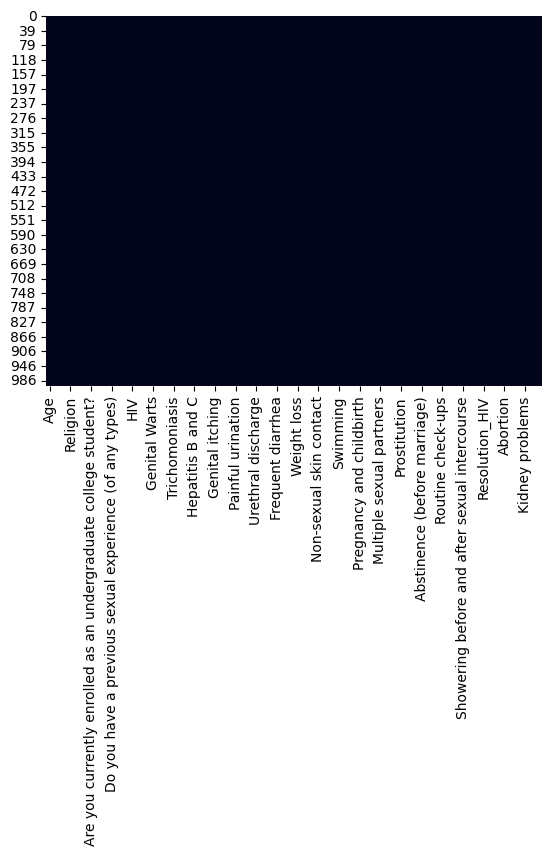

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [213]:
x=data.drop(['HIV'],axis=1)
y=data['HIV']


In [214]:
x.shape

(989, 71)

In [215]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Fit RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=x.columns)

# Select top 20 features
selected_columns = importances.sort_values(ascending=False).head(20)
print("Top 20 features:\n", selected_columns.index)

# Create x_selected DataFrame
x_selected = x[selected_columns.index]


Top 20 features:
 Index(['Age', 'Knowledge self-evaluation', 'Knowledge score',
       'Multiple sexual partners', 'Branch of study', 'No symptoms',
       'Resolution_HIV', 'Showering before and after sexual intercourse',
       'Abstinence (before marriage)', 'Gonorrhea', 'Single sexual partner',
       'Premature birth',
       'Do you know someone who has been diagnosed with a sexually transmitted infection?',
       'Pregnancy and childbirth', 'During breastfeeding',
       'Congenital defects', 'Genital ulcers', 'Marital experience',
       'Multiple marriages', 'Non-sexual skin contact'],
      dtype='object')


In [216]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [217]:
x_train.shape

(791, 71)

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc_before = accuracy_score(y_test, y_pred)

print("Accuracy before feature selection:", acc_before)


Accuracy before feature selection: 0.9797979797979798


In [219]:
x_train_sel, x_test_sel, y_train, y_test = train_test_split(
    x_selected, y, test_size=0.2, random_state=42
)

model.fit(x_train_sel, y_train)

y_pred_sel = model.predict(x_test_sel)
acc_after = accuracy_score(y_test, y_pred_sel)

print("Accuracy after feature selection:", acc_after)


Accuracy after feature selection: 0.9848484848484849


In [220]:
print("\nAccuracy Comparison")
print("-------------------")
print("Before feature selection :", acc_before)
print("After feature selection  :", acc_after)



Accuracy Comparison
-------------------
Before feature selection : 0.9797979797979798
After feature selection  : 0.9848484848484849


In [221]:
x_train.shape

(791, 71)

In [222]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


In [223]:
x_train.shape

(632, 71)

In [262]:
x_test.shape

(198, 71)

In [264]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train, y_train)


BernoulliNB()

In [266]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

cv_scores = cross_val_score(bnb, x, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(bnb, x, y, cv=5)

mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)


Cross-Validation Scores: [0.97979798 0.96969697 0.97474747 0.95454545 0.95939086]
Mean Cross-Validation Score: 0.9676357483464082


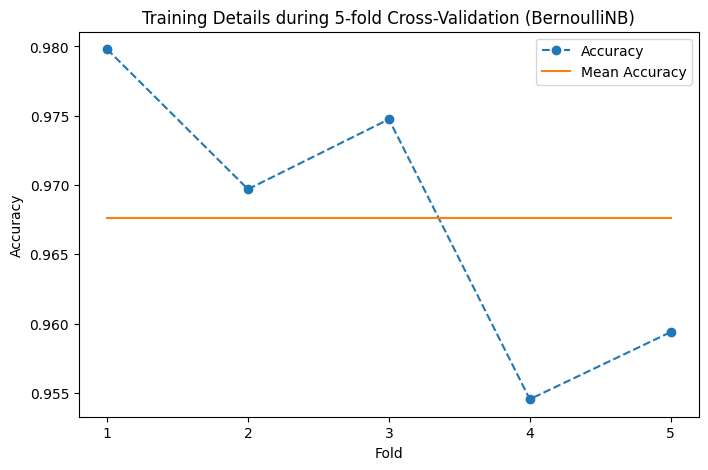

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation (BernoulliNB)')
plt.legend()
plt.show()


In [268]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('bnb', BernoulliNB())
])

y_pred = cross_val_predict(pipeline, x, y, cv=5)


In [269]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

print("\nClassification Report:")
print(classification_report(y, y_pred))


Accuracy : 0.9575328614762386
Precision: 0.987434554973822
Recall   : 0.9691675231243576
F1-score : 0.9782157676348547

Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.25      0.16        16
           1       0.99      0.97      0.98       973

    accuracy                           0.96       989
   macro avg       0.55      0.61      0.57       989
weighted avg       0.97      0.96      0.96       989



In [271]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [272]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

cv_scores = cross_val_score(gnb, x, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(gnb, x, y, cv=5)

mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)


Cross-Validation Scores: [0.42929293 0.39393939 0.31313131 0.27777778 0.4213198 ]
Mean Cross-Validation Score: 0.3670922422191457


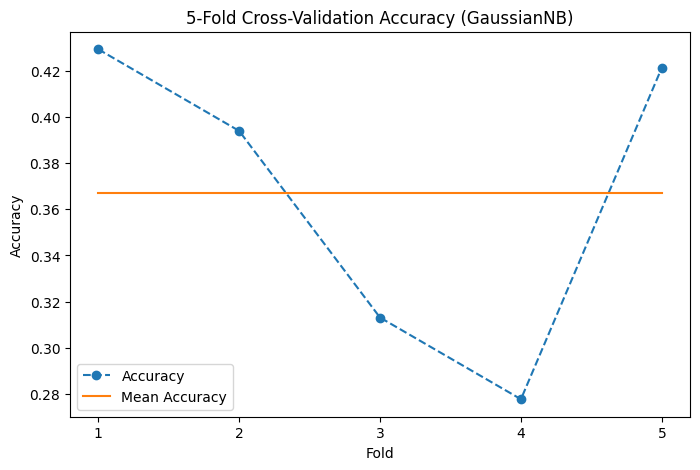

In [273]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracy (GaussianNB)')
plt.legend()
plt.show()


In [274]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('gnb', GaussianNB())
])

y_pred = cross_val_predict(pipeline, x, y, cv=5)


In [275]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report
)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

print("\nClassification Report:")
print(classification_report(y, y_pred))


Accuracy : 0.9140546006066734
Precision: 0.9857768052516411
Recall   : 0.9260020554984584
F1-score : 0.954954954954955

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.19      0.07        16
           1       0.99      0.93      0.95       973

    accuracy                           0.91       989
   macro avg       0.51      0.56      0.51       989
weighted avg       0.97      0.91      0.94       989



In [289]:
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer


In [290]:
feature_names = x.columns.tolist()
class_names = ['No HIV', 'HIV']

X_train = x.values


In [291]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier

final_model = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', VotingClassifier(
        estimators=[
            ('gnb', GaussianNB()),
            ('bnb', BernoulliNB())
        ],
        voting='soft'
    ))
])

final_model.fit(x, y)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('model',
                 VotingClassifier(estimators=[('gnb', GaussianNB()),
                                              ('bnb', BernoulliNB())],
                                  voting='soft'))])

In [292]:
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification',
    discretize_continuous=True
)


In [293]:
instance_id = 10  # change this index as needed
instance = x.iloc[instance_id].values

explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=final_model.predict_proba,
    num_features=10
)


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [294]:
explanation.show_in_notebook(show_table=True)


In [295]:
lime_df = pd.DataFrame(
    explanation.as_list(),
    columns=["Feature", "Contribution"]
)

print(lime_df)


                             Feature  Contribution
0                  Ethnicity <= 1.00  4.789452e-06
1     0.00 < Genital itching <= 1.00  1.132198e-06
2  0.00 < Multiple marriages <= 1.00  1.035093e-06
3  0.00 < Urethral discharge <= 1.00  1.024364e-06
4          Marital experience > 0.00 -9.857015e-07
5   0.00 < Painful urination <= 1.00  9.671931e-07
6                  Chlamydia <= 0.00  8.520785e-07
7           Genital swelling <= 0.00 -8.448395e-07
8                  Gonorrhea <= 0.00 -8.383179e-07
9               0.00 < Fever <= 1.00  7.356969e-07


In [296]:
categorical_features = [
    i for i, col in enumerate(x.columns)
    if x[col].nunique() <= 2
]


In [297]:
explainer = LimeTabularExplainer(
    training_data=x.values,
    feature_names=x.columns.tolist(),
    class_names=['No HIV', 'HIV'],
    categorical_features=categorical_features,
    mode='classification',
    discretize_continuous=False
)


In [298]:
explanation = explainer.explain_instance(
    x.iloc[10].values,
    final_model.predict_proba,
    num_features=10
)

explanation.show_in_notebook(show_table=True)


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [310]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier

final_model = VotingClassifier(
    estimators=[
        ('gnb', GaussianNB()),
        ('bnb', BernoulliNB())
    ],
    voting='soft'
)

final_model.fit(x_train_sel, y_train)


VotingClassifier(estimators=[('gnb', GaussianNB()), ('bnb', BernoulliNB())],
                 voting='soft')

In [ ]:
import shap

# Fit a single model (e.g., BernoulliNB) on selected features
bnb.fit(x_train_sel, y_train)

# Use KernelExplainer for Naive Bayes (black-box)
explainer = shap.KernelExplainer(bnb.predict_proba, x_train_sel)

# Compute SHAP values on test set
shap_values = explainer.shap_values(x_test_sel)

# Plot SHAP summary for positive class
shap.summary_plot(shap_values[1], x_test_sel, plot_type="bar")


PermutationExplainer explainer: 199it [00:25,  7.82it/s]                                                               
C:\Users\antuk\AppData\Local\Temp\ipykernel_35232\3518179853.py:26: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar")
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


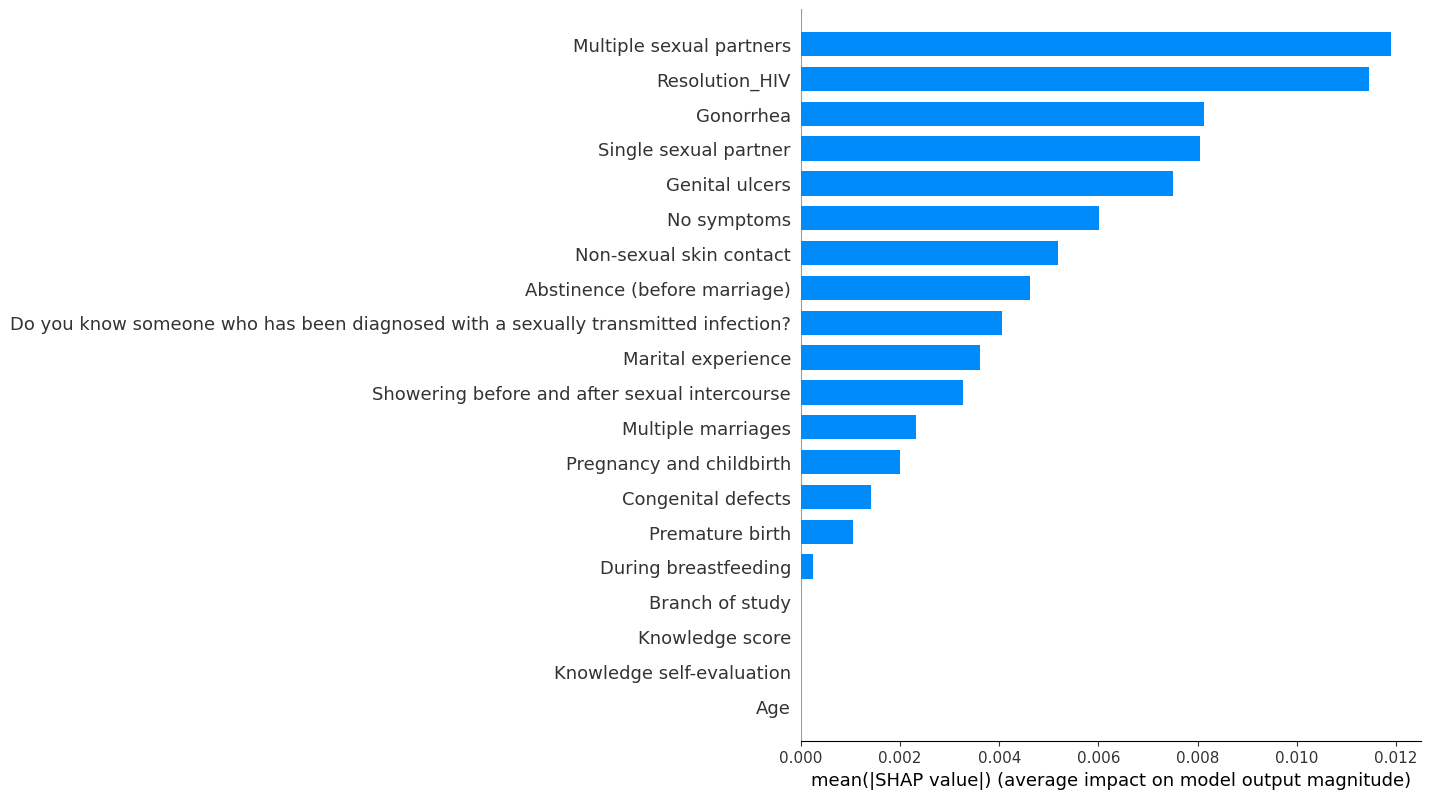

                                              Feature  Mean |SHAP value|
3                            Multiple sexual partners           0.011900
6                                      Resolution_HIV           0.011444
9                                           Gonorrhea           0.008130
10                              Single sexual partner           0.008046
16                                     Genital ulcers           0.007501
5                                         No symptoms           0.006015
19                            Non-sexual skin contact           0.005188
8                        Abstinence (before marriage)           0.004613
12  Do you know someone who has been diagnosed wit...           0.004053
17                                 Marital experience           0.003617
7       Showering before and after sexual intercourse           0.003271
18                                 Multiple marriages           0.002332
13                           Pregnancy and childbir

In [319]:
# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import shap
import matplotlib.pyplot as plt

# 2️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    x_selected, y, test_size=0.2, random_state=42
)

# 3️⃣ Fit BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# 4️⃣ Use shap.Explainer with a small background dataset
background = shap.sample(X_train, 100)  # sample 100 points for speed
explainer = shap.Explainer(bnb.predict_proba, background)

# 5️⃣ Compute SHAP values for test set (all samples or a subset)
shap_values = explainer(X_test)

# 6️⃣ Plot summary for positive class (HIV=1)
shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar")

# 7️⃣ Optional: feature importance table
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean |SHAP value|": np.abs(shap_values.values[:,:,1]).mean(axis=0)
}).sort_values(by="Mean |SHAP value|", ascending=False)

print(shap_df.head(20))


PermutationExplainer explainer: 199it [00:10,  5.05s/it]                                                               
C:\Users\antuk\AppData\Local\Temp\ipykernel_35232\1717928717.py:27: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


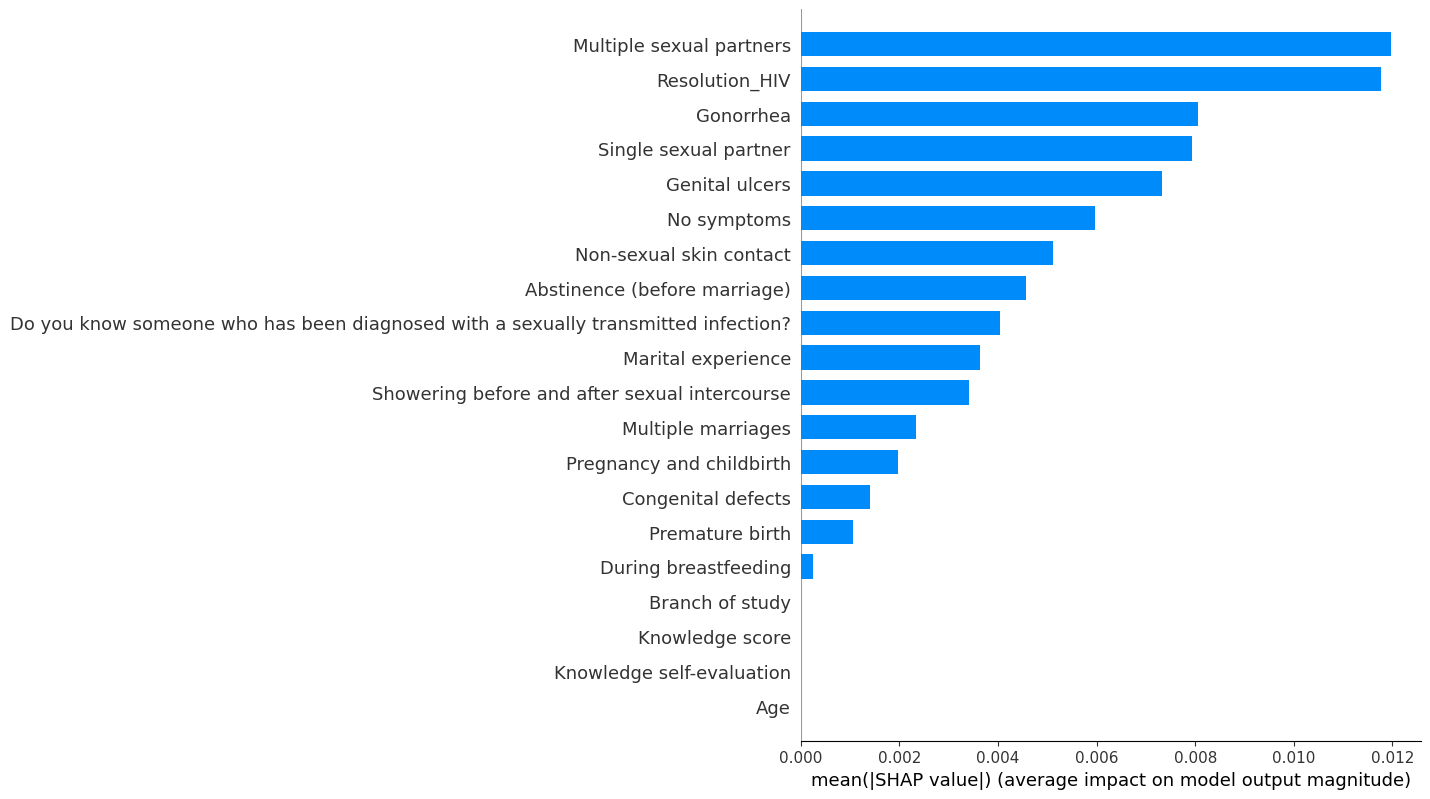

                                              Feature  Mean |SHAP value|
3                            Multiple sexual partners           0.011974
6                                      Resolution_HIV           0.011760
9                                           Gonorrhea           0.008063
10                              Single sexual partner           0.007940
16                                     Genital ulcers           0.007319
5                                         No symptoms           0.005978
19                            Non-sexual skin contact           0.005114
8                        Abstinence (before marriage)           0.004572
12  Do you know someone who has been diagnosed wit...           0.004046
17                                 Marital experience           0.003639
7       Showering before and after sexual intercourse           0.003405
18                                 Multiple marriages           0.002346
13                           Pregnancy and childbir

In [320]:
# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import shap
import matplotlib.pyplot as plt

# 2️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    x_selected, y, test_size=0.2, random_state=42
)

# 3️⃣ Fit BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# 4️⃣ SHAP Explainer
background = shap.sample(X_train, 100)
explainer = shap.Explainer(bnb.predict_proba, background)

# 5️⃣ Compute SHAP values
shap_values = explainer(X_test)

# 6️⃣ Create SHAP summary plot (do NOT show yet)
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values[:, :, 1],   # HIV = 1
    X_test,
    plot_type="bar",
    show=False
)

# 7️⃣ Save plot as JPEG
plt.savefig(
    "SHAP_BernoulliNB_Feature_Importance.jpg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# 8️⃣ Optional: SHAP feature importance table
shap_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean |SHAP value|": np.abs(shap_values.values[:, :, 1]).mean(axis=0)
}).sort_values(by="Mean |SHAP value|", ascending=False)

print(shap_df.head(20))


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


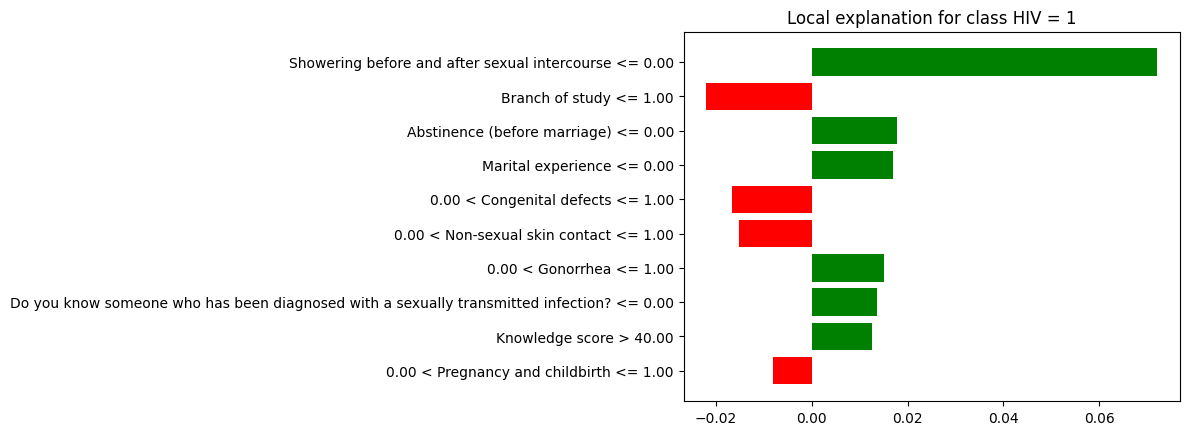

In [321]:
# 1️⃣ Imports
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# 2️⃣ Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=["HIV = 0", "HIV = 1"],
    mode="classification"
)

# 3️⃣ Generate explanation for a single instance
explanation = explainer.explain_instance(
    X_test.iloc[10].values,
    final_model.predict_proba,
    num_features=10
)

# 4️⃣ Convert explanation to matplotlib figure
fig = explanation.as_pyplot_figure()

# 5️⃣ Save as JPEG
plt.savefig(
    "LIME_Local_Explanation_Instance_10.jpg",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [278]:
# import pandas as pd
# from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [279]:
# gnb = GaussianNB()
# bnb = BernoulliNB()


In [280]:
# ensemble_nb = VotingClassifier(
#     estimators=[
#         ('GaussianNB', gnb),
#         ('BernoulliNB', bnb)
#     ],
#     voting='soft'   # uses predicted probabilities
# )


In [282]:
# gnb.fit(x_train, y_train)
# bnb.fit(x_train, y_train)
# ensemble_nb.fit(x_train, y_train)


VotingClassifier(estimators=[('GaussianNB', GaussianNB()),
                             ('BernoulliNB', BernoulliNB())],
                 voting='soft')

In [288]:
# def evaluate_model(model, x_test, y_test):
#     y_pred = model.predict(x_test)
#     return {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred),
#         "Recall": recall_score(y_test, y_pred),
#         "F1 Score": f1_score(y_test, y_pred)
#     }

# results = []

# results.append(
#     ["GaussianNB", *evaluate_model(gnb, x_test, y_test).values()]
# )

# results.append(
#     ["BernoulliNB", *evaluate_model(bnb, x_test, y_test).values()]
# )

# results.append(
#     ["GaussianNB + BernoulliNB (Ensemble)", *evaluate_model(ensemble_nb, x_test, y_test).values()]
# )


In [287]:
# results_df = pd.DataFrame(
#     results,
#     columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
# )

# print(results_df.round(3).to_string(index=False))


In [286]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

smote = SMOTE(random_state=42)

gnb = Pipeline([
    ('smote', smote),
    ('model', GaussianNB())
])

bnb = Pipeline([
    ('smote', smote),
    ('model', BernoulliNB())
])

ensemble = Pipeline([
    ('smote', smote),
    ('model', VotingClassifier(
        estimators=[
            ('gnb', GaussianNB()),
            ('bnb', BernoulliNB())
        ],
        voting='soft'
    ))
])

models = {
    "GaussianNB": gnb,
    "BernoulliNB": bnb,
    "GaussianNB + BernoulliNB (Ensemble)": ensemble
}

results = []

for name, model in models.items():
    y_pred = cross_val_predict(model, x, y, cv=5)
    results.append([
        name,
        accuracy_score(y, y_pred),
        precision_score(y, y_pred),
        recall_score(y, y_pred),
        f1_score(y, y_pred)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print(results_df.round(3).to_string(index=False))


                              Model  Accuracy  Precision  Recall  F1 Score
                         GaussianNB     0.914      0.986   0.926     0.955
                        BernoulliNB     0.958      0.987   0.969     0.978
GaussianNB + BernoulliNB (Ensemble)     0.928      0.986   0.940     0.963


In [224]:
models = {
    'LinearSVC': LinearSVC(max_iter=5000, random_state=42),
    'CalibratedClassifierCV': CalibratedClassifierCV(LinearSVC(max_iter=5000, random_state=42)),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'RidgeClassifier': RidgeClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=42, max_iter=1000),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
    'Perceptron': Perceptron(max_iter=1000, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'BaggingClassifier': BaggingClassifier(random_state=42),
    'BernoulliNB': BernoulliNB(),
    'LGBMClassifier': LGBMClassifier(),
    'NuSVC': NuSVC(probability=True),
    'XGBClassifier': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'NearestCentroid': NearestCentroid(),
    'SVC': SVC(probability=True),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LabelSpreading': LabelSpreading(),
    'LabelPropagation': LabelPropagation(),
    'DummyClassifier': DummyClassifier(strategy="most_frequent")
}


In [225]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []

    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Probabilities / decision scores
            if hasattr(model, "predict_proba"):
                y_proba = model.predict_proba(X_test)[:, 1]
            elif hasattr(model, "decision_function"):
                y_proba = model.decision_function(X_test)
                y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
            else:
                y_proba = None

            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            mcc = matthews_corrcoef(y_test, y_pred)

            cm = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

            if y_proba is not None:
                roc_auc = roc_auc_score(y_test, y_proba)
                try:
                    lloss = log_loss(y_test, y_proba)
                except Exception:
                    lloss = np.nan
            else:
                roc_auc = np.nan
                lloss = np.nan

            results.append([
                name, acc, bal_acc, roc_auc, f1,
                precision, recall, specificity, mcc, lloss
            ])

        except Exception:
            results.append([name] + [np.nan]*9)

    return pd.DataFrame(results, columns=[
        'Model', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score',
        'Precision', 'Recall', 'Specificity', 'MCC', 'Log Loss'
    ])


In [226]:
df_before = evaluate_models(
    models,
    x_train, x_test,
    y_train, y_test
)

df_before["Stage"] = "Before Feature Selection"


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 619, number of negative: 13
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.979430 -> initscore=3.863156
[LightGBM] [Info] Start training from score 3.863156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_p

In [227]:
df_after = evaluate_models(
    models,
    x_train_sel, x_test_sel,
    y_train, y_test
)

df_after["Stage"] = "After Feature Selection"


In [228]:
final_df = pd.concat([df_before, df_after], ignore_index=True)

final_df = final_df.sort_values(
    by=["Accuracy", "Stage"],
    ascending=[False, True]
)

print(final_df.round(3).to_string(index=False))


                        Model  Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Precision  Recall  Specificity    MCC  Log Loss                    Stage
            RidgeClassifierCV     1.000              1.000    1.000     1.000      1.000   1.000          1.0  1.000     0.072 Before Feature Selection
QuadraticDiscriminantAnalysis     0.995              0.750    0.750     0.997      0.995   1.000          0.5  0.705     0.182 Before Feature Selection
       CalibratedClassifierCV     0.990              0.500    0.724     0.995      0.990   1.000          0.0  0.000     0.058 Before Feature Selection
              RidgeClassifier     0.990              0.500    0.985     0.995      0.990   1.000          0.0  0.000     0.267 Before Feature Selection
  PassiveAggressiveClassifier     0.990              0.500    0.467     0.995      0.990   1.000          0.0  0.000     0.776 Before Feature Selection
                SGDClassifier     0.990              0.500    0.500     0.995      0.990

In [229]:
import pandas as pd

# -------------------------------------------------
# 1️⃣ Add Stage labels
# -------------------------------------------------
df_before["Stage"] = "Before Feature Selection"
df_after["Stage"] = "After Feature Selection"

# -------------------------------------------------
# 2️⃣ Combine both results
# -------------------------------------------------
final_df = pd.concat([df_before, df_after], ignore_index=True)

# -------------------------------------------------
# 3️⃣ Keep only required metrics
# -------------------------------------------------
metrics = [
    "Accuracy",
    "Balanced Accuracy",
    "ROC AUC",
    "F1 Score",
    "MCC"
]

final_df = final_df[["Model", "Stage"] + metrics]

# -------------------------------------------------
# 4️⃣ Pivot to wide (Excel-friendly) format
# -------------------------------------------------
pivot_df = final_df.pivot(
    index="Model",
    columns="Stage",
    values=metrics
)

# -------------------------------------------------
# 5️⃣ Flatten multi-level columns
# -------------------------------------------------
pivot_df.columns = [
    f"{metric} ({stage})"
    for metric, stage in pivot_df.columns
]

# -------------------------------------------------
# 6️⃣ Reorder columns exactly as requested
# -------------------------------------------------
ordered_columns = [
    "Accuracy (After Feature Selection)",
    "Accuracy (Before Feature Selection)",
    "Balanced Accuracy (After Feature Selection)",
    "Balanced Accuracy (Before Feature Selection)",
    "ROC AUC (After Feature Selection)",
    "ROC AUC (Before Feature Selection)",
    "F1 Score (After Feature Selection)",
    "F1 Score (Before Feature Selection)",
    "MCC (After Feature Selection)",
    "MCC (Before Feature Selection)"
]

pivot_df = pivot_df[ordered_columns]

# -------------------------------------------------
# 7️⃣ Reset index so Model becomes a column
# -------------------------------------------------
pivot_df.reset_index(inplace=True)

# -------------------------------------------------
# 8️⃣ Save to CSV (Excel-ready)
# -------------------------------------------------
pivot_df.round(3).to_csv(
    "RandomForestClassifier_comparison_before_after.csv",
    index=False
)

# -------------------------------------------------
# 9️⃣ Display nicely in console
# -------------------------------------------------
print(pivot_df.round(3).to_string(index=False))

print("\nCSV file saved as 'CHI_model_comparison_before_after.csv'")


                        Model  Accuracy (After Feature Selection)  Accuracy (Before Feature Selection)  Balanced Accuracy (After Feature Selection)  Balanced Accuracy (Before Feature Selection)  ROC AUC (After Feature Selection)  ROC AUC (Before Feature Selection)  F1 Score (After Feature Selection)  F1 Score (Before Feature Selection)  MCC (After Feature Selection)  MCC (Before Feature Selection)
           AdaBoostClassifier                                 NaN                                0.980                                          NaN                                         0.495                                NaN                               0.467                                 NaN                                0.990                            NaN                          -0.010
            BaggingClassifier                                 NaN                                0.985                                          NaN                                         0.497     

In [230]:
print("hello world")

hello world


In [231]:
x.shape

(989, 71)

In [232]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: HIV, Length: 989, dtype: int64

In [233]:
# y.shape

In [234]:
# asdfa

# New 

In [235]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [236]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)
# x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)


In [237]:
# from sklearn.metrics import accuracy_score, classification_report

# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Random Forest': RandomForestClassifier(),
#     # add other models here
# }

# for name, model in models.items():
#     model.fit(x_train_resampled, y_train_resampled)  # train on balanced data
#     y_pred = model.predict(x_test)                  # test on original test set
#     score = accuracy_score(y_test, y_pred)
#     print(f"{name} model with accuracy: {score:.4f}")
#     print(classification_report(y_test, y_pred))


In [238]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [239]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# from collections import Counter
# print("Before SMOTE:", Counter(y_train))
# print("After SMOTE:", Counter(y_train_resampled))


In [240]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(6,4))
# plt.bar(['Before SMOTE - 0', 'Before SMOTE - 1'], [Counter(y_train)[0], Counter(y_train)[1]], color='red', alpha=0.6)
# plt.bar(['After SMOTE - 0', 'After SMOTE - 1'], [Counter(y_train_resampled)[0], Counter(y_train_resampled)[1]], color='green', alpha=0.6)
# plt.title('Effect of SMOTE on Class Distribution')
# plt.show()


In [241]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.metrics import accuracy_score

In [242]:
# models = {
#     'LogisticRegression': LogisticRegression(),
#     'GaussianNB':GaussianNB(),
#     'SVC':SVC(),
#     'KNeighborsClassifier':KNeighborsClassifier(),
#     'DecisionTreeClassifier':DecisionTreeClassifier(),
#     'ExtraTreeClassifier':ExtraTreeClassifier(),
#     'RandomForestClassifier':RandomForestClassifier(),
#     'BaggingClassifier':BaggingClassifier(),
#     'GradientBoostingClassifier':GradientBoostingClassifier(),
#     'AdaBoostClassifier':AdaBoostClassifier()
# }

In [243]:
# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     score = accuracy_score(y_test, y_pred)
#     print(f"{name} model with accuracy: {score}")

In [244]:
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import accuracy_score

# # Step 1: Apply SMOTE only to the training set
# smote = SMOTE(random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# # Step 2: Train and evaluate each model on resampled data
# for name, model in models.items():
#     model.fit(x_train_resampled, y_train_resampled)  # train on balanced data
#     y_pred = model.predict(x_test)                   # test on original test set
#     score = accuracy_score(y_test, y_pred)
#     print(f"{name} model with accuracy: {score:.4f}")


In [245]:
# from sklearn.metrics import classification_report

# for name, model in models.items():
#     model.fit(x_train_resampled, y_train_resampled)
#     y_pred = model.predict(x_test)
#     print(f"\n{name} model results:")
#     print(classification_report(y_test, y_pred))


In [246]:
# from collections import Counter
# print(Counter(y_test))


In [247]:
# from sklearn.model_selection import StratifiedKFold, cross_val_score

# skf = StratifiedKFold(n_splits=5)
# scores = cross_val_score(model, x, y, cv=skf, scoring='f1_macro')
# print("Average F1 Macro:", scores.mean())


In [248]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=2, stratify=y
# )


In [249]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# import matplotlib.pyplot as plt

# smote = SMOTE(random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# print("Before SMOTE:", Counter(y_train))
# print("After SMOTE:", Counter(y_train_resampled))

# # Visualization (optional)
# plt.figure(figsize=(6,4))
# plt.bar(['Before SMOTE - 0', 'Before SMOTE - 1'], [Counter(y_train)[0], Counter(y_train)[1]], color='red', alpha=0.6)
# plt.bar(['After SMOTE - 0', 'After SMOTE - 1'], [Counter(y_train_resampled)[0], Counter(y_train_resampled)[1]], color='green', alpha=0.6)
# plt.title('Effect of SMOTE on Class Distribution')
# plt.show()


In [250]:
# from sklearn.metrics import classification_report, confusion_matrix

# for name, model in models.items():
#     model.fit(x_train_resampled, y_train_resampled)
#     y_pred = model.predict(x_test)
#     print(f"\n{name} model results:")
#     print(classification_report(y_test, y_pred))


In [251]:
# from sklearn.svm import LinearSVC
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier, Perceptron, LogisticRegression
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.ensemble import BaggingClassifier

In [252]:
# clf = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
# clf.fit(x_train, y_train)

# y_pred = clf.predict(x_test)
# y_proba = clf.predict_proba(x_test)[:, 1]

# # 5. Evaluation metrics
# acc = accuracy_score(y_test, y_pred)
# bal_acc = balanced_accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_proba)
# f1 = f1_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# mcc = matthews_corrcoef(y_test, y_pred)
# lloss = log_loss(y_test, y_proba)
# cm = confusion_matrix(y_test, y_pred)

# # Specificity (True Negative Rate)
# tn, fp, fn, tp = cm.ravel()
# specificity = tn / (tn + fp)

# # 6. Print all metrics
# print(f"Accuracy: {acc:.3f}")
# print(f"Balanced Accuracy: {bal_acc:.3f}")
# print(f"ROC AUC: {roc_auc:.3f}")
# print(f"F1 Score: {f1:.3f}")
# print(f"Precision: {precision:.3f}")
# print(f"Recall (Sensitivity): {recall:.3f}")
# print(f"Specificity: {specificity:.3f}")
# print(f"Matthews Correlation Coefficient: {mcc:.3f}")
# print(f"Log Loss: {lloss:.3f}")
# print("\nConfusion Matrix:")
# print(cm)

# # 7. Optional: Plot confusion matrix
# import matplotlib.pyplot as plt
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()




In [253]:
# models = {
#     'LinearSVC': LinearSVC(max_iter=5000, random_state=42),
#     'CalibratedClassifierCV': CalibratedClassifierCV(LinearSVC(max_iter=5000, random_state=42)),
#     'RidgeClassifierCV': RidgeClassifierCV(),
#     'RidgeClassifier': RidgeClassifier(),
#     'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
#     'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=42, max_iter=1000),
#     'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
#     'Perceptron': Perceptron(max_iter=1000, random_state=42),
#     'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
#     'BaggingClassifier': BaggingClassifier(random_state=42)
# }

# results = []

# for name, model in models.items():
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)

#     # Probabilities for ROC AUC and Log Loss
#     if hasattr(model, "predict_proba"):
#         y_proba = model.predict_proba(x_test)[:, 1]
#     elif hasattr(model, "decision_function"):
#         y_proba = model.decision_function(x_test)
#         # Scale decision_function for ROC AUC and log_loss (if not binary)
#         y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
#     else:
#         y_proba = None

#     acc = accuracy_score(y_test, y_pred)
#     bal_acc = balanced_accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     mcc = matthews_corrcoef(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
#     tn, fp, fn, tp = cm.ravel()
#     specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

#     # ROC AUC
#     if y_proba is not None:
#         roc_auc = roc_auc_score(y_test, y_proba)
#         try:
#             lloss = log_loss(y_test, y_proba)
#         except Exception:
#             lloss = np.nan
#     else:
#         roc_auc = np.nan
#         lloss = np.nan

#     results.append([name, acc, bal_acc, roc_auc, f1, precision, recall, specificity, mcc, lloss])

# df = pd.DataFrame(results, columns=[
#     'Model', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score',
#     'Precision', 'Recall', 'Specificity', 'MCC', 'Log Loss'
# ])

# # Display as table
# print(df.round(3).to_string(index=False))

In [254]:
models = {
    'LinearSVC': LinearSVC(max_iter=5000, random_state=42),
    'CalibratedClassifierCV': CalibratedClassifierCV(LinearSVC(max_iter=5000, random_state=42)),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'RidgeClassifier': RidgeClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(random_state=42, max_iter=1000),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
    'Perceptron': Perceptron(max_iter=1000, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'BaggingClassifier': BaggingClassifier(random_state=42),
    'BernoulliNB': BernoulliNB(),
    'LGBMClassifier': LGBMClassifier(),
    'NuSVC': NuSVC(probability=True),
    'XGBClassifier': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    'NearestCentroid': NearestCentroid(),
    'SVC': SVC(probability=True),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LabelSpreading': LabelSpreading(),
    'LabelPropagation': LabelPropagation(),
    'DummyClassifier': DummyClassifier(strategy="most_frequent")
}

results = []

for name, model in models.items():
    try:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # For ROC AUC and Log Loss
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(x_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(x_test)
            # scale to [0,1] for compatibility
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
        else:
            y_proba = None

        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

        if y_proba is not None:
            roc_auc = roc_auc_score(y_test, y_proba)
            try:
                lloss = log_loss(y_test, y_proba)
            except Exception:
                lloss = np.nan
        else:
            roc_auc = np.nan
            lloss = np.nan

        results.append([name, acc, bal_acc, roc_auc, f1, precision, recall, specificity, mcc, lloss])
    except Exception as e:
        # If model fails, fill with NaN
        results.append([name] + [np.nan]*9)

df = pd.DataFrame(results, columns=[
    'Model', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score',
    'Precision', 'Recall', 'Specificity', 'MCC', 'Log Loss'
])


# Display the table with 3 decimal places
print(df.sort_values(by="Accuracy", ascending=False).round(3).to_string(index=False))

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 619, number of negative: 13
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.979430 -> initscore=3.863156
[LightGBM] [Info] Start training from score 3.863156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                        Model  Accuracy  Balanced Accuracy  ROC AUC  F1 Score  Precision  Recall  Specificity    MCC  Log Loss
            RidgeClassifierCV     1.000              1.000    1.000     1.000      1.000   1.000          1.0  1.000     0.072
QuadraticDiscriminantAnalysis     0.995              0.750    0.750     0.997      0.995   1.000          0.5  0.705     0.182
              DummyClassifier     0.990              0.500    0.500     0.995      0.990   1.000          0.0  0.000     0.364
                          SVC     0.990              0.500    0.765     0.995      0.990   1.000          0.0  0.000     0.056
              RidgeClassifier     0.990              0.500    0.985     0.995      0.990   1.000          0.0  0.000     0.267
  PassiveAggressiveClassifier     0.990              0.500    0.467     0.995      0.990   1.000          0.0  0.000     0.776
                SGDClassifier     0.990              0.500    0.500     0.995      0.990   1.000          0.0  

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [255]:
# df.to_csv("General.csv", index=True)

In [256]:
#NUSVC
#Logistic Regresion

In [257]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data (replace with full list if needed)
# data = {
#     'Model': [
#         'RidgeClassifierCV', 'QuadraticDiscriminantAnalysis', 'XGBClassifier',
#         'LGBMClassifier', 'KNeighborsClassifier', 'ExtraTreesClassifier',
#         'RandomForestClassifier', 'SVC', 'CalibratedClassifierCV', 'DummyClassifier'
#     ],
#     'Accuracy': [1.000, 0.995, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990],
#     'Balanced Accuracy': [1.000, 0.750, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500],
#     'ROC AUC': [1.000, 0.750, 0.492, 0.668, 0.485, 0.485, 0.747, 0.393, 0.587, 0.500],
#     'F1 Score': [1.000, 0.997, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995],
#     'Precision': [1.000, 0.995, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990],
#     'Recall': [1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000],
#     'Specificity': [1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     'MCC': [1.000, 0.705, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
#     'Log Loss': [0.058, 0.182, 0.084, 0.104, 0.371, 0.219, 0.055, 0.063, 0.062, 0.364]
# }

# # Create DataFrame
# df = pd.DataFrame(data)

# # Metrics to plot
# metrics = ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score',
#            'Precision', 'Recall', 'Specificity', 'MCC', 'Log Loss']

# # Plotting setup
# x = np.arange(len(df['Model']))
# width = 0.08  # narrower width for more bars

# fig, ax = plt.subplots(figsize=(18, 8))

# # Plot each metric
# for i, metric in enumerate(metrics):
#     ax.bar(x + i * width, df[metric], width, label=metric)

# # Formatting
# ax.set_xlabel('Model', fontsize=12)
# ax.set_ylabel('Score', fontsize=12)
# ax.set_title('Model Comparison Across Multiple Metrics', fontsize=14)
# ax.set_xticks(x + width * (len(metrics) / 2))
# ax.set_xticklabels(df['Model'], rotation=45, ha='right')
# ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
# ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()


In [258]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data (replace with full list if needed)
# data = {
#     'Model': [
#         'RidgeClassifierCV', 'QuadraticDiscriminantAnalysis', 'XGBClassifier',
#         'LGBMClassifier', 'KNeighborsClassifier', 'ExtraTreesClassifier',
#         'RandomForestClassifier', 'SVC', 'CalibratedClassifierCV', 'DummyClassifier'
#     ],
#     'Accuracy': [1.000, 0.995, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990],
#     'Balanced Accuracy': [1.000, 0.750, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500],
#     'ROC AUC': [1.000, 0.750, 0.492, 0.668, 0.485, 0.485, 0.747, 0.393, 0.587, 0.500],
#     'F1 Score': [1.000, 0.997, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 0.995],
#     'Precision': [1.000, 0.995, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990, 0.990],
#     'Recall': [1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000],
#     'Specificity': [1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#     'MCC': [1.000, 0.705, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
#     'Log Loss': [0.058, 0.182, 0.084, 0.104, 0.371, 0.219, 0.055, 0.063, 0.062, 0.364]
# }

# # Create DataFrame
# df = pd.DataFrame(data)

# # Metrics to plot
# metrics = ['Accuracy', 'Balanced Accuracy', 'ROC AUC', 'F1 Score',
#            'Precision', 'Recall', 'Specificity', 'MCC', 'Log Loss']

# # Plotting setup
# x = np.arange(len(df['Model']))
# width = 0.08  # narrower width for more bars

# fig, ax = plt.subplots(figsize=(18, 8))

# # Plot each metric
# for i, metric in enumerate(metrics):
#     ax.bar(x + i * width, df[metric], width, label=metric)

# # Formatting
# ax.set_xlabel('Model', fontsize=12)
# ax.set_ylabel('Score', fontsize=12)
# ax.set_title('Model Comparison Across Multiple Metrics', fontsize=14)
# ax.set_xticks(x + width * (len(metrics) / 2))
# ax.set_xticklabels(df['Model'], rotation=45, ha='right')
# ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
# ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()


# Model Building

In [259]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=42
# )

# x_train, X_val, y_train, y_val = train_test_split(
#     x_train, y_train, test_size=0.2, random_state=42
# )


In [260]:
x_train.shape

(632, 71)

In [261]:
x_train.shape

(632, 71)